In [1]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("../../amazon_reviews_us_Grocery_v1_00.tsv", sep='\t', quoting=3)
df = df[["product_id", "star_rating", "review_body"]]
df

product_id  star_rating  \
0        B000SAQCWC            5   
1        B00509LVIQ            5   
2        B00KHXESLC            5   
3        B000F8JIIC            5   
4        B004ZWR9RQ            5   
...             ...          ...   
2402453  B00004TBB0            4   
2402454  B00000K1X9            5   
2402455  B00000K1X9            5   
2402456  B00000K1X9            5   
2402457  B00000K1X9            5   

                                               review_body  
0        As a family allergic to wheat, dairy, eggs, nu...  
1        My favorite nut.  Creamy, crunchy, salty, and ...  
2        This green tea tastes so good! My girlfriend l...  
3        I love Melissa's brand but this is a great sec...  
4                                                     good  
...                                                    ...  
2402453  The Amor Belhom Duo are likely the only musici...  
2402454  Being  a  Breyer  collecter  almost  all  of  ...  
2402455  This model is beautiful.  each model is hand p...  
2402456  As a person who has collected Breyers all my l...  
2402457  This Breyer horse is wonderful. She is beautif...  

[2402458 rows x 3 columns]

In [28]:
data = df.dropna()
data = data.query('star_rating < 4', engine='python')
data = data.sample(100000)
data

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id  star_rating  \
2105534  B000H27MQG            1   
2328442  B001EQ5S4W            1   
2088725  B005VV6THG            1   
1301923  B00CB4PKIA            2   
1560795  B007RAM6AS            1   
...             ...          ...   
896895   B000KFXEYE            1   
1116317  B001JU6BYE            2   
2240442  B00132RPN4            2   
853812   B003D5LHRE            1   
645495   B00NGTTRWO            2   

                                               review_body  
2105534  This company has ripped off the consumer by no...  
2328442  If you're looking for a good, easy, packaged q...  
2088725  Looking for Alfajores similar to what I ate at...  
1301923  I was so looking forward to this but I'm great...  
1560795  These are black himalayan summer truffles, the...  
...                                                    ...  
896895             Not so much. Expensive and really, MEH.  
1116317  This might be one of the most disgusting thing...  
2240442  I like the portion control aspect of these bag...  
853812   I thought these would be different. They are d...  
645495   As a Paleo dieter, I know that sacrificing tas...  

[100000 rows x 3 columns]

In [29]:
#data['review_body'] = data['review_body'].map(lambda x: re.sub('[,\.!?]', '', x))
#data['review_body'] = data['review_body'].map(lambda x: x.lower())
data = data["review_body"]
data

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2105534    This company has ripped off the consumer by no...
2328442    If you're looking for a good, easy, packaged q...
2088725    Looking for Alfajores similar to what I ate at...
1301923    I was so looking forward to this but I'm great...
1560795    These are black himalayan summer truffles, the...
                                 ...                        
896895               Not so much. Expensive and really, MEH.
1116317    This might be one of the most disgusting thing...
2240442    I like the portion control aspect of these bag...
853812     I thought these would be different. They are d...
645495     As a Paleo dieter, I know that sacrificing tas...
Name: review_body, Length: 100000, dtype: object

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


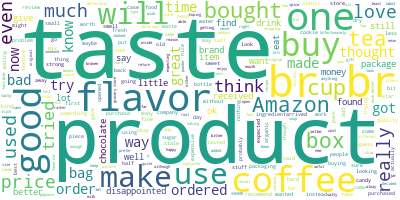

In [30]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [31]:
stop_words = stopwords.words('english')
stop_words.extend(['br','[', ',', '\\', '.', '!', '?', ']', '<', '>', '$', '£', '/', '*', '(', ')', '%', '^', '&', '-', '_', '=', '+', '|', '#','~',';',':','...',"''",'//','\\\\',"n't","'ve","'m","'s","'"])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(str(sentence)))
        
def remove_stopwords(texts):
    return [[(te,ta) for (te,ta) in doc if (te.replace("_NEG","") not in stop_words)] for doc in texts]

data_filtered = data
data_words = list(sent_to_words(data_filtered))
# remove stop words
#data_words = remove_stopwords(data_words)
pprint.pprint(data_words[:5])
#np.array(data_words[0], dtype=object).shape

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['This',
  'company',
  'has',
  'ripped',
  'off',
  'the',
  'consumer',
  'by',
  'not',
  'making',
  'it',
  'condensed',
  'like',
  'it',
  'used',
  'to',
  'so',
  'you',
  'get',
  'less',
  'soup',
  'for',
  'a',
  'can',
  'of',
  'it',
  '.',
  'PLUS',
  'NO',
  'MEAT',
  'IN',
  'IT',
  'WHATSOEVER',
  '.',
  'They',
  'SHOULD',
  'be',
  'ashamed',
  'of',
  'themselves',
  '!'],
 ['If',
  'you',
  "'re",
  'looking',
  'for',
  'a',
  'good',
  ',',
  'easy',
  ',',
  'packaged',
  'queso',
  'soup',
  ',',
  'this',
  'IS',
  "N'T",
  'it',
  '.',
  'It',
  'is',
  'easy',
  ',',
  'but',
  'that',
  'is',
  'the',
  'only',
  'good',
  'thing',
  'I',
  'can',
  'say',
  'about',
  'it',
  '.'],
 ['Looking',
  'for',
  'Alfajores',
  'similar',
  'to',
  'what',
  'I',
  'ate',
  'at',
  'a',
  'restaurant',
  '.',
  'Of',
  'course',
  ',',
  'nothing',
  'comes',
  'close',
  'to',
  'homemade',
  'but',
  'I',
  'was',
  'hoping',
  'for',
  'something',
  'close

In [32]:
data_words = [[word.lower() for word in data_point] for data_point in data_words]
data_words

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['this',
  'company',
  'has',
  'ripped',
  'off',
  'the',
  'consumer',
  'by',
  'not',
  'making',
  'it',
  'condensed',
  'like',
  'it',
  'used',
  'to',
  'so',
  'you',
  'get',
  'less',
  'soup',
  'for',
  'a',
  'can',
  'of',
  'it',
  '.',
  'plus',
  'no',
  'meat',
  'in',
  'it',
  'whatsoever',
  '.',
  'they',
  'should',
  'be',
  'ashamed',
  'of',
  'themselves',
  '!'],
 ['if',
  'you',
  "'re",
  'looking',
  'for',
  'a',
  'good',
  ',',
  'easy',
  ',',
  'packaged',
  'queso',
  'soup',
  ',',
  'this',
  'is',
  "n't",
  'it',
  '.',
  'it',
  'is',
  'easy',
  ',',
  'but',
  'that',
  'is',
  'the',
  'only',
  'good',
  'thing',
  'i',
  'can',
  'say',
  'about',
  'it',
  '.'],
 ['looking',
  'for',
  'alfajores',
  'similar',
  'to',
  'what',
  'i',
  'ate',
  'at',
  'a',
  'restaurant',
  '.',
  'of',
  'course',
  ',',
  'nothing',
  'comes',
  'close',
  'to',
  'homemade',
  'but',
  'i',
  'was',
  'hoping',
  'for',
  'something',
  'close

In [33]:
import nltk.sentiment.util
tokens = list(map(nltk.word_tokenize, data))
negated_tokens = list(map(nltk.sentiment.util.mark_negation, tokens))
data = negated_tokens

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#print(data_words)
def tag(texts):
    #tokens = list(map(nltk.word_tokenize, texts))
    tagged = [nltk.pos_tag(text, tagset='universal') for text in texts]
    negated_tokens = list(map(nltk.sentiment.util.mark_negation, texts))
    negated_tagged = [[(negated_tokens[i][j], tagged[i][j][1]) for j in range(len(texts[i]))] for i in range(len(texts))]
    return negated_tagged
negated_tagged = tag(data_words)
negated_tagged

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('this', 'DET'),
  ('company', 'NOUN'),
  ('has', 'VERB'),
  ('ripped', 'VERB'),
  ('off', 'PRT'),
  ('the', 'DET'),
  ('consumer', 'NOUN'),
  ('by', 'ADP'),
  ('not', 'ADV'),
  ('making_NEG', 'VERB'),
  ('it_NEG', 'PRON'),
  ('condensed_NEG', 'VERB'),
  ('like_NEG', 'ADP'),
  ('it_NEG', 'PRON'),
  ('used_NEG', 'VERB'),
  ('to_NEG', 'PRT'),
  ('so_NEG', 'ADV'),
  ('you_NEG', 'PRON'),
  ('get_NEG', 'VERB'),
  ('less_NEG', 'ADJ'),
  ('soup_NEG', 'NOUN'),
  ('for_NEG', 'ADP'),
  ('a_NEG', 'DET'),
  ('can_NEG', 'VERB'),
  ('of_NEG', 'ADP'),
  ('it_NEG', 'PRON'),
  ('.', '.'),
  ('plus', 'CONJ'),
  ('no', 'DET'),
  ('meat_NEG', 'NOUN'),
  ('in_NEG', 'ADP'),
  ('it_NEG', 'PRON'),
  ('whatsoever_NEG', 'DET'),
  ('.', '.'),
  ('they', 'PRON'),
  ('should', 'VERB'),
  ('be', 'VERB'),
  ('ashamed', 'VERB'),
  ('of', 'ADP'),
  ('themselves', 'PRON'),
  ('!', '.')],
 [('if', 'ADP'),
  ('you', 'PRON'),
  ("'re", 'VERB'),
  ('looking', 'VERB'),
  ('for', 'ADP'),
  ('a', 'DET'),
  ('good', 'ADJ'),


In [35]:
data_words = remove_stopwords(negated_tagged)
data_words

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('company', 'NOUN'),
  ('ripped', 'VERB'),
  ('consumer', 'NOUN'),
  ('making_NEG', 'VERB'),
  ('condensed_NEG', 'VERB'),
  ('like_NEG', 'ADP'),
  ('used_NEG', 'VERB'),
  ('get_NEG', 'VERB'),
  ('less_NEG', 'ADJ'),
  ('soup_NEG', 'NOUN'),
  ('plus', 'CONJ'),
  ('meat_NEG', 'NOUN'),
  ('whatsoever_NEG', 'DET'),
  ('ashamed', 'VERB')],
 [("'re", 'VERB'),
  ('looking', 'VERB'),
  ('good', 'ADJ'),
  ('easy', 'ADJ'),
  ('packaged', 'VERB'),
  ('queso', 'NOUN'),
  ('soup', 'NOUN'),
  ('easy', 'ADJ'),
  ('good', 'ADJ'),
  ('thing', 'NOUN'),
  ('say', 'VERB')],
 [('looking', 'VERB'),
  ('alfajores', 'NOUN'),
  ('similar', 'ADJ'),
  ('ate', 'VERB'),
  ('restaurant', 'NOUN'),
  ('course', 'NOUN'),
  ('nothing', 'NOUN'),
  ('comes_NEG', 'VERB'),
  ('close_NEG', 'ADV'),
  ('homemade_NEG', 'VERB'),
  ('hoping_NEG', 'VERB'),
  ('something_NEG', 'NOUN'),
  ('close_NEG', 'ADJ'),
  ('buying_NEG', 'VERB')],
 [('looking', 'VERB'),
  ('forward', 'ADV'),
  ('greatly', 'ADV'),
  ('disappointed', 'ADJ'),
 

In [42]:
#gets adjectives

def get_adjectives(tagged):
    review_a = [word for (word, tag) in tagged if (tag == 'ADJ')]# or tag == 'ADV' or tag == 'NOUN' or tag == 'VERB')]
    return review_a

data_words = list(map(lambda x: get_adjectives(x), data_words))

'''
for i in range(len(data_words)):
    data_words[i] = [word for (word,tag) in data_words[i]]
'''
data_words


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['less_NEG'],
 ['good', 'easy', 'easy', 'good'],
 ['similar', 'close_NEG'],
 ['disappointed', 'twelve', 'regular', 'vague', 'sad'],
 ['black', 'himalayan', 'bland'],
 ['bad', 'hydrogenated'],
 ['nasty'],
 ['huge_NEG', 'huge', 'popular', 'favorite', 'ur'],
 ['white_NEG', 'salty', 'smart', 'recent', 'popcorn'],
 ['starter',
  'outdated',
  'personal',
  'modern',
  'professional',
  'small',
  'full',
  'larger',
  'difficult',
  'great',
  'stable',
  'able',
  'awesome',
  'helpful',
  'able',
  'first',
  'hard_NEG',
  'large',
  'stressful',
  'first'],
 ['timothys', 'spanish', 'robust', 'weak'],
 [],
 ['wrong',
  'espresso',
  'espresso',
  'full_NEG',
  'forceful_NEG',
  'thick_NEG',
  'normal_NEG',
  'slower_NEG',
  'less_NEG',
  'normal_NEG'],
 ['tasty_NEG', 'good', 'sleeved', 'bavarian'],
 [],
 ['disgusting', 'super', 'rancid', 'defective'],
 [],
 ['good', 'expensive'],
 ['good', 'whole'],
 ['regular', '.48', 'dishonest'],
 ['smaller', 'clear', 'small', 'whole', 'full'],
 ['lit

In [43]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
pprint.pprint(corpus[:5])

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1)],
 [(1, 2), (2, 2)],
 [(3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1)]]


In [48]:
# number of topics
num_topics = 75
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       minimum_probability=0.1,
                                       workers=3,
                                       passes=2)
# Print the Keyword in the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(73,
  '0.272*"awful" + 0.164*"smaller" + 0.048*"artificial_NEG" + 0.044*"daily" + '
  '0.023*"first" + 0.023*"distinct" + 0.021*"soggy" + 0.016*"great" + '
  '0.015*"good" + 0.013*"slimy"'),
 (35,
  '0.060*"surprised" + 0.049*"olive_NEG" + 0.041*"stupid" + 0.031*"softer" + '
  '0.029*"january" + 0.026*"waxy" + 0.022*"high_NEG" + 0.022*"brittle" + '
  '0.022*"protein" + 0.021*"fructose_NEG"'),
 (3,
  '0.133*"many_NEG" + 0.121*"total" + 0.102*"fat" + 0.043*"fish" + '
  '0.025*"fatty" + 0.019*"k-cup_NEG" + 0.017*"excellent_NEG" + 0.015*"less" + '
  '0.014*"main_NEG" + 0.014*"usable"'),
 (9,
  '0.053*"brown_NEG" + 0.049*"irish" + 0.044*"suppose" + 0.032*"tastier" + '
  '0.027*"dissapointed" + 0.026*"german" + 0.025*"good" + 0.023*"unappetizing" '
  '+ 0.018*"candy" + 0.018*"overwhelming_NEG"'),
 (30,
  '0.229*"black" + 0.131*"sour" + 0.067*"full_NEG" + 0.057*"original_NEG" + '
  '0.031*"raw_NEG" + 0.029*"various" + 0.029*"nespresso" + 0.028*"good" + '
  '0.025*"great" + 0.014*"bulk"'),
 

In [49]:
pprint.pprint(lda_model.print_topics(num_topics=100))

[(0,
  '0.133*"much_NEG" + 0.096*"green_NEG" + 0.078*"short" + 0.049*"easier" + '
  '0.043*"sour_NEG" + 0.035*"tried" + 0.025*"nutritional_NEG" + '
  '0.021*"metallic" + 0.021*"interested" + 0.018*"positive_NEG"'),
 (1,
  '0.080*"careful" + 0.074*"positive" + 0.060*"vegetable" + 0.044*"bean" + '
  '0.040*"sensitive" + 0.036*"greasy" + 0.023*"dangerous" + '
  '0.020*"unfortunate" + 0.019*"chicken" + 0.019*"good"'),
 (2,
  '0.185*"sure" + 0.130*"okay" + 0.110*"single" + 0.058*"bigger" + '
  '0.051*"sick" + 0.045*"sorry" + 0.039*"good" + 0.034*"edible_NEG" + '
  '0.026*"upset" + 0.018*"creamy_NEG"'),
 (3,
  '0.133*"many_NEG" + 0.121*"total" + 0.102*"fat" + 0.043*"fish" + '
  '0.025*"fatty" + 0.019*"k-cup_NEG" + 0.017*"excellent_NEG" + 0.015*"less" + '
  '0.014*"main_NEG" + 0.014*"usable"'),
 (4,
  '0.156*"light" + 0.091*"rich" + 0.032*"deep" + 0.030*"top_NEG" + '
  '0.030*"bold_NEG" + 0.027*"popular" + 0.021*"tolerable" + '
  '0.021*"correct_NEG" + 0.019*"good" + 0.018*"generous"'),
 (5,


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
from itertools import chain
lda_corpus = lda_model[corpus]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
data_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(data_vis)

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(threshold)

In [43]:
'''cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]
print(1)
cluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]
print(2)
cluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]
print(3)
'''

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

In [ ]:
'''print(cluster1[:100], "\n \n")
print(cluster2[:100], "\n \n")
print(cluster3[:100], "\n")
'''